<a href="https://colab.research.google.com/github/ggzlemos/KMeans/blob/main/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Esse notebook implementa o algoritmo K-Means no dataset de íris. Removeu-se o rótulos dos exemplos do conjunto de dados para possibilitar a aplicação de um algoritmo de clusterização.

##Esta atividade faz parte do treinamento básico do Hub de Inovação em Intligência Artifical (H2IA)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

####Função que calcula a distância euclidiana


In [ ]:
def distancia_euclidiana(a, b):
  dist = np.sqrt(np.sum((a-b) ** 2))
  return dist

####Classe que implementa o algoritmo KMeans

In [ ]:
class KMeans:
  def __init__(self, dados, k_clusters, n_iters):

    self.k_clusters = k_clusters
    self.n_iters = n_iters
    self.dados = np.array(dados)
    self.num_exe, self.dim = dados.shape 
    self.centroides = []
    self.clusters = [[] for i in range(k_clusters)]

  def inicializaCentroides(self):
     #np.random.seed(24)
     idxs = np.random.choice(self.num_exe, self.k_clusters, replace= False).tolist()         
     centroides = self.dados[idxs] 
     #print(centroides)  
     self.centroides = centroides.tolist()
          
  def prediz(self):
    self.inicializaCentroides()   
    for i in range(self.n_iters):   
      self.clusters = self.getClusters()     
      centroides_velhos = self.centroides
      self.centroides = self.setCentroides(self.clusters)

      if self.convergeu(centroides_velhos, self.centroides) == 0:        
        break

    return self.clusters

  def getClusters(self):
    clusters = [[] for i in range(self.k_clusters)] 

    for exemplo in self.dados:
      dists = []            
      for i in range(len(self.centroides)):           
        dist = distancia_euclidiana(exemplo, self.centroides[i])        
        dists.append(dist)
      index = dists.index(min(dists))
      clusters[index].append(exemplo)
    
    return clusters  
     
  
  def setCentroides(self, clusters):
    centroides = []
    for i in clusters:
      x = []
      for j in i:
        x.append(j.tolist())     
      media = np.mean(x, axis = 0)
      centroides.append(media)

    return centroides

  def convergeu(self, c_velhos, c_novos):
    dists = []
    for i in range(self.k_clusters):
      dist = distancia_euclidiana(c_velhos[i], c_novos[i])
      dists.append(dist) 
   
    return sum(dists)        

####Leitura dos dados, filtragem do identificador e do rótulo, para possibilitar a implementação do KMeans

In [ ]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
atr = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
atr.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


####Normalização dos dados utilizando o sklearn

In [ ]:
data_normalizado = StandardScaler().fit_transform(atr)
data_normalizado = pd.DataFrame(data_normalizado, columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])
data_normalizado.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


####Redução dimensional utilizando PCA, do sklearn

In [ ]:
pcs = PCA(n_components = len(data_normalizado.columns))
pcs.fit_transform(data_normalizado)

array([[-2.26454173e+00,  5.05703903e-01, -1.21943348e-01,
        -2.30733235e-02],
       [-2.08642550e+00, -6.55404729e-01, -2.27250832e-01,
        -1.03208244e-01],
       [-2.36795045e+00, -3.18477311e-01,  5.14796236e-02,
        -2.78252250e-02],
       [-2.30419716e+00, -5.75367713e-01,  9.88604444e-02,
         6.63114622e-02],
       [-2.38877749e+00,  6.74767397e-01,  2.14278490e-02,
         3.73972870e-02],
       [-2.07053681e+00,  1.51854856e+00,  3.06842583e-02,
        -4.39877494e-03],
       [-2.44571134e+00,  7.45626750e-02,  3.42197636e-01,
         3.80965668e-02],
       [-2.23384186e+00,  2.47613932e-01, -8.25744645e-02,
         2.55051623e-02],
       [-2.34195768e+00, -1.09514636e+00,  1.53562399e-01,
         2.67938291e-02],
       [-2.18867576e+00, -4.48629048e-01, -2.46559522e-01,
         3.99073035e-02],
       [-2.16348656e+00,  1.07059558e+00, -2.64009373e-01,
        -1.53011377e-02],
       [-2.32737775e+00,  1.58587455e-01,  1.00165616e-01,
      

####Gráfico do "cotovelo"

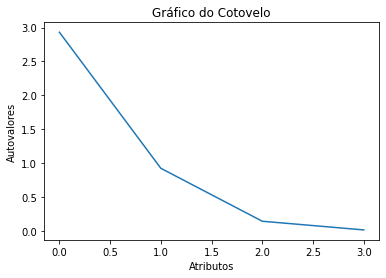

In [ ]:
plt.ylabel("Autovalores")
plt.xlabel("Atributos")
plt.title("Gráfico do Cotovelo")
plt.plot(pcs.explained_variance_)
plt.show()

####Escolha do número de PCs utilizados

In [ ]:
pcs = PCA(n_components = 2)
a = pcs.fit_transform(data_normalizado)
a = pd.DataFrame(a)
a.shape

(150, 2)

####Plot do gráfico, dividindo o problema em 3 clusters 

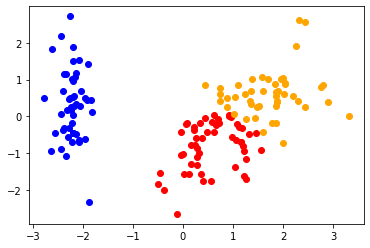

In [ ]:
kmeans = KMeans(a, 3, 100)
kmeans.prediz()
b = kmeans.clusters
colors = ['blue', 'red', 'orange']
k = 0
for i in b:
  for j in i:
    plt.scatter(j[0], j[1], color=colors[k])
  k+=1 

##Referências Utilizadas nesta implementação

[K-Means clustering explained](https://towardsdatascience.com/k-means-clustering-explained-4528df86a120#:~:text=K%2Dmeans%20clustering%20aims%20to,methods%20to%20measure%20the%20distance.)

[A simple explanation of K-Means clustering](https://www.analyticsvidhya.com/blog/2020/10/a-simple-explanation-of-k-means-clustering/)

[Step by step - K-Means explained in detail](https://www.kaggle.com/shrutimechlearn/step-by-step-kmeans-explained-in-detail)

[K-means Cluster Analysis](https://uc-r.github.io/kmeans_clustering)

[StatsQuest](https://www.youtube.com/watch?v=4b5d3muPQmA)

[StatQuest: Principal Component Analysis (PCA), Step-by-Step](https://www.youtube.com/watch?v=FgakZw6K1QQ)

